# 🎓 Week 12 - Day 1: Introduction to NLP

## Today's Goals:
✅ Master text preprocessing techniques

✅ Build BoW and TF-IDF representations

✅ Explore Word2Vec embeddings

---

## 🔧 Part 1: Setup - Install & Import All Libraries

**IMPORTANT:** Run ALL cells in this part sequentially!

In [1]:
# STEP 1: Install required packages
print("📦 Installing packages...\n")
!pip install -q nltk gensim scikit-learn matplotlib seaborn pandas numpy
print("\n✅ All packages installed successfully!")

📦 Installing packages...


✅ All packages installed successfully!


In [2]:
# STEP 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import NLTK
import nltk

# Sklearn for BoW and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Gensim for Word2Vec
import gensim
import gensim.downloader as api

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# STEP 3: Download NLTK data
print("📥 Downloading NLTK data...\n")

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("✅ NLTK data downloaded!")

📥 Downloading NLTK data...

✅ NLTK data downloaded!


In [4]:
# STEP 4: Import NLTK functions (AFTER downloading data)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Setup complete!")
print("🚀 Ready to explore NLP!")

✅ Setup complete!
🚀 Ready to explore NLP!


## 📝 Part 2: Text Preprocessing

Let's clean and prepare raw text for machine learning!

In [5]:
# Sample text documents
documents = [
    "Natural Language Processing is amazing! It helps computers understand text.",
    "I love studying AI and Machine Learning. Deep Learning is fascinating!",
    "Text preprocessing includes tokenization, lemmatization, and stopword removal."
]

print("📚 Original Documents:\n")
for i, doc in enumerate(documents, 1):
    print(f"Doc {i}: {doc}")
print("\n" + "="*80)

📚 Original Documents:

Doc 1: Natural Language Processing is amazing! It helps computers understand text.
Doc 2: I love studying AI and Machine Learning. Deep Learning is fascinating!
Doc 3: Text preprocessing includes tokenization, lemmatization, and stopword removal.



In [6]:
# Step 1: Tokenization
print("\n🔹 STEP 1: TOKENIZATION\n")
print("Breaking text into individual words (tokens)\n")

sample_text = documents[0]
tokens = word_tokenize(sample_text)

print(f"Original Text:")
print(f"  {sample_text}\n")
print(f"Tokens (Words):")
print(f"  {tokens}\n")
print(f"Number of tokens: {len(tokens)}")
print("\n" + "="*80)


🔹 STEP 1: TOKENIZATION

Breaking text into individual words (tokens)

Original Text:
  Natural Language Processing is amazing! It helps computers understand text.

Tokens (Words):
  ['Natural', 'Language', 'Processing', 'is', 'amazing', '!', 'It', 'helps', 'computers', 'understand', 'text', '.']

Number of tokens: 12



In [7]:
# Step 2: Lowercasing
print("\n🔹 STEP 2: LOWERCASING\n")
print("Converting all text to lowercase\n")

tokens_lower = [token.lower() for token in tokens]

print(f"Before lowercasing: {tokens[:5]}")
print(f"After lowercasing:  {tokens_lower[:5]}")
print("\n💡 Now 'Natural' and 'natural' are treated the same!")
print("\n" + "="*80)


🔹 STEP 2: LOWERCASING

Converting all text to lowercase

Before lowercasing: ['Natural', 'Language', 'Processing', 'is', 'amazing']
After lowercasing:  ['natural', 'language', 'processing', 'is', 'amazing']

💡 Now 'Natural' and 'natural' are treated the same!



In [8]:
# Step 3: Remove punctuation and stopwords
print("\n🔹 STEP 3: REMOVE PUNCTUATION & STOPWORDS\n")

stop_words = set(stopwords.words('english'))
print(f"Number of English stopwords: {len(stop_words)}")
print(f"Examples: {list(stop_words)[:10]}\n")

# Keep only alphabetic tokens and filter out stopwords
tokens_clean = [token for token in tokens_lower 
                if token.isalpha() and token not in stop_words]

print(f"Before cleaning: {len(tokens_lower)} tokens")
print(f"After cleaning:  {len(tokens_clean)} tokens")
print(f"\nRemoved: {len(tokens_lower) - len(tokens_clean)} tokens (punctuation + stopwords)")
print(f"\nCleaned tokens: {tokens_clean}")
print("\n" + "="*80)


🔹 STEP 3: REMOVE PUNCTUATION & STOPWORDS

Number of English stopwords: 198
Examples: ['the', 'why', "i'm", 'against', 'other', 'it', "that'll", 'as', 'i', 'if']

Before cleaning: 12 tokens
After cleaning:  8 tokens

Removed: 4 tokens (punctuation + stopwords)

Cleaned tokens: ['natural', 'language', 'processing', 'amazing', 'helps', 'computers', 'understand', 'text']



In [9]:
# Step 4: Lemmatization
print("\n🔹 STEP 4: LEMMATIZATION\n")
print("Converting words to their base form\n")

lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_clean]

print("Examples of lemmatization:")
print(f"  'running' → '{lemmatizer.lemmatize('running')}'")
print(f"  'better' → '{lemmatizer.lemmatize('better')}'")
print(f"  'studies' → '{lemmatizer.lemmatize('studies')}'")
print(f"\nBefore: {tokens_clean}")
print(f"After:  {tokens_lemmatized}")
print("\n✅ Text preprocessing complete!")
print("\n" + "="*80)


🔹 STEP 4: LEMMATIZATION

Converting words to their base form

Examples of lemmatization:
  'running' → 'running'
  'better' → 'better'
  'studies' → 'study'

Before: ['natural', 'language', 'processing', 'amazing', 'helps', 'computers', 'understand', 'text']
After:  ['natural', 'language', 'processing', 'amazing', 'help', 'computer', 'understand', 'text']

✅ Text preprocessing complete!



In [10]:
# Complete preprocessing function
def preprocess_text(text):
    """
    Complete text preprocessing pipeline
    
    Steps:
    1. Tokenize
    2. Lowercase
    3. Remove punctuation and stopwords
    4. Lemmatize
    
    Returns: list of cleaned tokens
    """
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lowercase
    tokens = [t.lower() for t in tokens]
    
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

# Test the function
print("\n🧪 TESTING PREPROCESSING FUNCTION\n")
test_texts = [
    "The cats are running quickly through the gardens!",
    "She's studying Machine Learning and Deep Learning.",
    "I love coding in Python and building AI models."
]

for text in test_texts:
    result = preprocess_text(text)
    print(f"Original:  {text}")
    print(f"Processed: {result}")
    print()

print("✅ Preprocessing function works perfectly!")


🧪 TESTING PREPROCESSING FUNCTION

Original:  The cats are running quickly through the gardens!
Processed: ['cat', 'running', 'quickly', 'garden']

Original:  She's studying Machine Learning and Deep Learning.
Processed: ['studying', 'machine', 'learning', 'deep', 'learning']

Original:  I love coding in Python and building AI models.
Processed: ['love', 'coding', 'python', 'building', 'ai', 'model']

✅ Preprocessing function works perfectly!


### 💡 Key Insights:

✅ **Tokenization** breaks text into individual words

✅ **Lowercasing** treats "AI" and "ai" as the same word

✅ **Stopword removal** removes common words like "the", "is", "and"

✅ **Lemmatization** reduces words to base form ("running" → "run")

---

## 👜 Part 3: Bag of Words (BoW)

Representing text as word frequency vectors!

In [11]:
# Simple corpus for BoW demonstration
corpus = [
    "I love AI",
    "AI is cool",
    "I love coding"
]

print("📊 BAG OF WORDS (BoW) REPRESENTATION\n")
print("Simple Corpus:")
for i, doc in enumerate(corpus, 1):
    print(f"  Doc {i}: {doc}")
print()

📊 BAG OF WORDS (BoW) REPRESENTATION

Simple Corpus:
  Doc 1: I love AI
  Doc 2: AI is cool
  Doc 3: I love coding



In [12]:
# Create BoW representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

# Get vocabulary
vocab = vectorizer.get_feature_names_out()

print(f"Vocabulary (unique words): {list(vocab)}")
print(f"Vocabulary size: {len(vocab)}")
print(f"\nBoW Matrix shape: {bow_matrix.shape}")
print(f"  → {bow_matrix.shape[0]} documents")
print(f"  → {bow_matrix.shape[1]} unique words")
print()

Vocabulary (unique words): ['ai', 'coding', 'cool', 'is', 'love']
Vocabulary size: 5

BoW Matrix shape: (3, 5)
  → 3 documents
  → 5 unique words



In [13]:
# Convert to DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vocab)
bow_df.index = [f'Doc {i+1}' for i in range(len(corpus))]

print("BoW as DataFrame (word counts):")
print(bow_df)
print()

# Explanation
print("💡 How to read this table:")
print("  - Each row = one document")
print("  - Each column = one word from vocabulary")
print("  - Values = count of that word in that document")
print("  - Example: 'ai' appears 1 time in Doc 1, 1 time in Doc 2, 0 times in Doc 3")
print()

BoW as DataFrame (word counts):
       ai  coding  cool  is  love
Doc 1   1       0     0   0     1
Doc 2   1       0     1   1     0
Doc 3   0       1     0   0     1

💡 How to read this table:
  - Each row = one document
  - Each column = one word from vocabulary
  - Values = count of that word in that document
  - Example: 'ai' appears 1 time in Doc 1, 1 time in Doc 2, 0 times in Doc 3



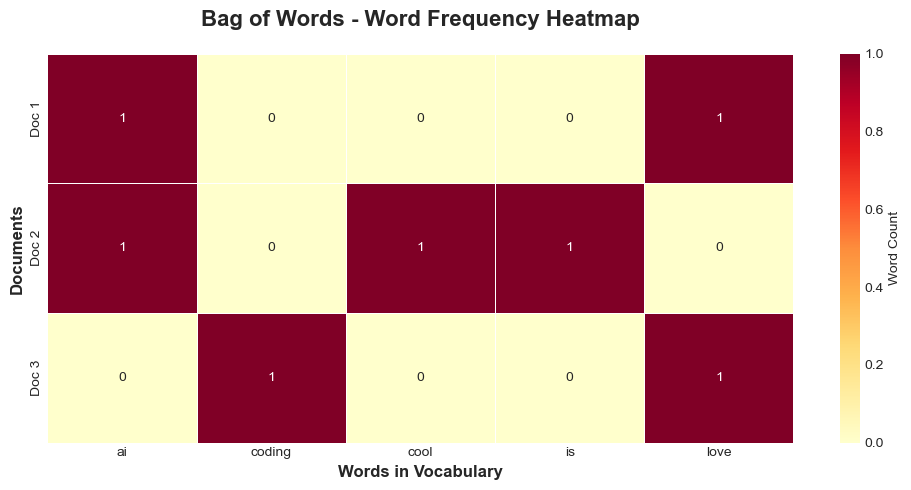

✅ BoW representation created and visualized!


In [14]:
# Visualize as heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(bow_df, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Word Count'}, linewidths=0.5)
plt.title('Bag of Words - Word Frequency Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Words in Vocabulary', fontsize=12, fontweight='bold')
plt.ylabel('Documents', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ BoW representation created and visualized!")

### 💡 Key Insights:

✅ **Each document** becomes a vector of word counts

✅ **Simple and interpretable** - easy to understand

❌ **Ignores word order** - "I love AI" and "AI love I" look the same

❌ **All words treated equally** - "the" gets same weight as "AI"

**Solution:** TF-IDF addresses these issues!

---

## 📊 Part 4: TF-IDF (Better than BoW!)

TF-IDF highlights important words and downweights common ones.

In [15]:
# Larger corpus for TF-IDF
tech_corpus = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks for complex tasks",
    "Natural language processing helps computers understand text",
    "Computer vision enables machines to interpret images",
    "Reinforcement learning trains agents through rewards"
]

print("🎯 TF-IDF REPRESENTATION\n")
print("Tech Corpus:")
for i, doc in enumerate(tech_corpus, 1):
    print(f"  {i}. {doc}")
print()

🎯 TF-IDF REPRESENTATION

Tech Corpus:
  1. Machine learning is a subset of artificial intelligence
  2. Deep learning uses neural networks for complex tasks
  3. Natural language processing helps computers understand text
  4. Computer vision enables machines to interpret images
  5. Reinforcement learning trains agents through rewards



In [16]:
# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tech_corpus)

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")
print(f"  → {tfidf_matrix.shape[0]} documents")
print(f"  → {tfidf_matrix.shape[1]} unique words")
print(f"\nVocabulary size: {len(tfidf_vectorizer.get_feature_names_out())} words")
print()

TF-IDF Matrix shape: (5, 33)
  → 5 documents
  → 33 unique words

Vocabulary size: 33 words



In [17]:
# Convert to DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df.index = [f'Doc {i+1}' for i in range(len(tech_corpus))]

print("TF-IDF Scores (showing first 8 words):")
print(tfidf_df.iloc[:, :8].round(3))
print("\n💡 Higher score = more important to that document")
print()

TF-IDF Scores (showing first 8 words):
       agents  artificial  complex  computer  computers   deep  enables    for
Doc 1   0.000       0.394    0.000     0.000      0.000  0.000    0.000  0.000
Doc 2   0.000       0.000    0.366     0.000      0.000  0.366    0.000  0.366
Doc 3   0.000       0.000    0.000     0.000      0.378  0.000    0.000  0.000
Doc 4   0.000       0.000    0.000     0.378      0.000  0.000    0.378  0.000
Doc 5   0.428       0.000    0.000     0.000      0.000  0.000    0.000  0.000

💡 Higher score = more important to that document



In [18]:
# Find top words in each document
print("📌 TOP 3 MOST IMPORTANT WORDS PER DOCUMENT:\n")

for i, doc in enumerate(tech_corpus):
    top_words = tfidf_df.iloc[i].nlargest(3)
    print(f"Doc {i+1}: \"{doc}\"")
    print(f"  Top words: {', '.join(top_words.index)}")
    print(f"  Scores: {', '.join([f'{s:.3f}' for s in top_words.values])}")
    print()

📌 TOP 3 MOST IMPORTANT WORDS PER DOCUMENT:

Doc 1: "Machine learning is a subset of artificial intelligence"
  Top words: artificial, intelligence, is
  Scores: 0.394, 0.394, 0.394

Doc 2: "Deep learning uses neural networks for complex tasks"
  Top words: complex, deep, for
  Scores: 0.366, 0.366, 0.366

Doc 3: "Natural language processing helps computers understand text"
  Top words: computers, helps, language
  Scores: 0.378, 0.378, 0.378

Doc 4: "Computer vision enables machines to interpret images"
  Top words: computer, enables, images
  Scores: 0.378, 0.378, 0.378

Doc 5: "Reinforcement learning trains agents through rewards"
  Top words: agents, reinforcement, rewards
  Scores: 0.428, 0.428, 0.428



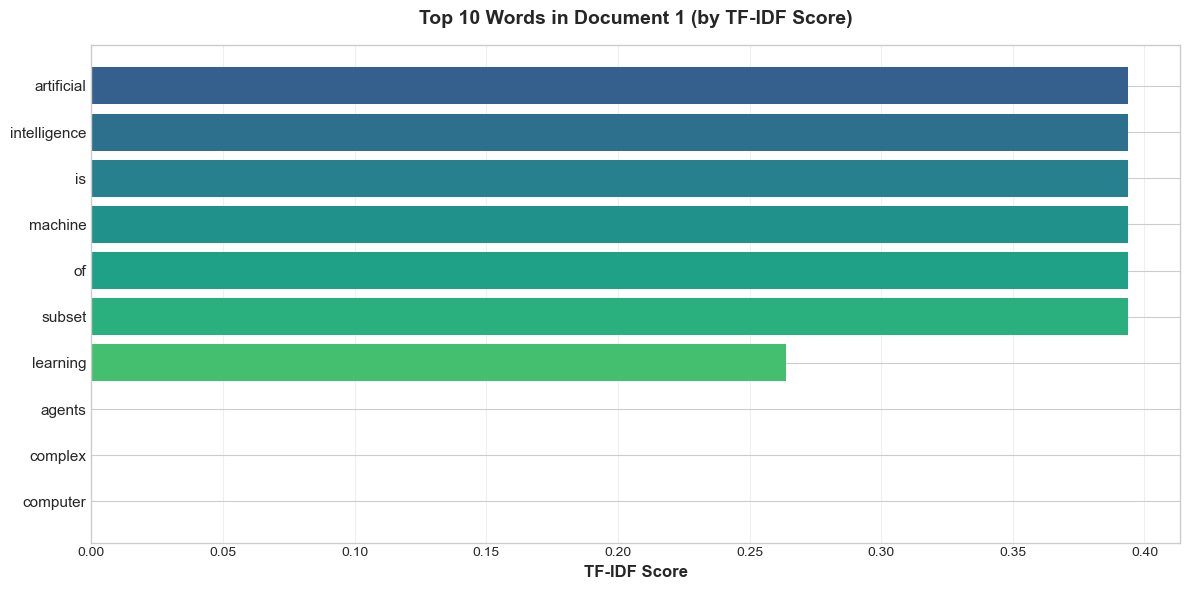

✅ TF-IDF analysis complete!


In [19]:
# Visualize TF-IDF for first document
doc_idx = 0
top_n = 10
top_tfidf = tfidf_df.iloc[doc_idx].nlargest(top_n)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_tfidf)))
plt.barh(range(len(top_tfidf)), top_tfidf.values, color=colors)
plt.yticks(range(len(top_tfidf)), top_tfidf.index, fontsize=11)
plt.xlabel('TF-IDF Score', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Words in Document 1 (by TF-IDF Score)', 
         fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ TF-IDF analysis complete!")

### 💡 Key Insights:

✅ **TF-IDF** = Term Frequency × Inverse Document Frequency

✅ **Highlights document-specific words** - "machine" gets high score in Doc 1

✅ **Downweights common words** - "learning" appears in 3 docs → lower score

✅ **Better for classification** - captures what makes each document unique

---

## 🌟 Part 5: Word Embeddings with Word2Vec

Exploring semantic relationships between words!

In [20]:
# Load pre-trained Word2Vec model
print("⏳ Loading pre-trained Word2Vec model...")
print("   (Downloading ~65MB - this may take 1-2 minutes)")
print("   Please wait...\n")

try:
    # Load GloVe model (50-dimensional word vectors)
    word2vec_model = api.load("glove-wiki-gigaword-50")
    
    print("✅ Word2Vec model loaded successfully!\n")
    print(f"📊 Model Statistics:")
    print(f"   Vocabulary size: {len(word2vec_model):,} words")
    print(f"   Vector dimensions: {word2vec_model.vector_size}")
    print(f"   Model type: GloVe (Global Vectors)")
    
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("\nPlease check your internet connection and try again.")
    print("If the error persists, restart the notebook and run all cells again.")

⏳ Loading pre-trained Word2Vec model...
   (Downloading ~65MB - this may take 1-2 minutes)
   Please wait...

[==================================================] 100.0% 66.0/66.0MB downloaded
✅ Word2Vec model loaded successfully!

📊 Model Statistics:
   Vocabulary size: 400,000 words
   Vector dimensions: 50
   Model type: GloVe (Global Vectors)


In [21]:
# Explore word vectors
print("\n📐 EXPLORING WORD VECTORS\n")

word = "king"
vector = word2vec_model[word]

print(f"Word: '{word}'")
print(f"Vector shape: {vector.shape}")
print(f"\nFirst 10 dimensions of '{word}' vector:")
print(vector[:10].round(3))
print(f"\n💡 Each word is represented as {word2vec_model.vector_size} numbers!")
print("   Similar meanings → similar vectors")


📐 EXPLORING WORD VECTORS

Word: 'king'
Vector shape: (50,)

First 10 dimensions of 'king' vector:
[ 0.505  0.686 -0.595 -0.023  0.6   -0.135 -0.088  0.474 -0.618 -0.31 ]

💡 Each word is represented as 50 numbers!
   Similar meanings → similar vectors


In [22]:
# Find similar words
print("\n🔍 FINDING SIMILAR WORDS\n")

test_words = ["king", "python", "happy", "computer"]

for word in test_words:
    try:
        similar = word2vec_model.most_similar(word, topn=5)
        print(f"Words similar to '{word}':")
        for similar_word, score in similar:
            print(f"  • {similar_word:15s} (similarity: {score:.3f})")
        print()
    except KeyError:
        print(f"⚠️  Word '{word}' not in vocabulary\n")


🔍 FINDING SIMILAR WORDS

Words similar to 'king':
  • prince          (similarity: 0.824)
  • queen           (similarity: 0.784)
  • ii              (similarity: 0.775)
  • emperor         (similarity: 0.774)
  • son             (similarity: 0.767)

Words similar to 'python':
  • reticulated     (similarity: 0.692)
  • spamalot        (similarity: 0.664)
  • php             (similarity: 0.641)
  • owl             (similarity: 0.630)
  • mouse           (similarity: 0.628)

Words similar to 'happy':
  • 'm              (similarity: 0.914)
  • everyone        (similarity: 0.898)
  • everybody       (similarity: 0.897)
  • really          (similarity: 0.884)
  • me              (similarity: 0.878)

Words similar to 'computer':
  • computers       (similarity: 0.917)
  • software        (similarity: 0.881)
  • technology      (similarity: 0.853)
  • electronic      (similarity: 0.813)
  • internet        (similarity: 0.806)



In [23]:
# Word arithmetic - The Magic!
print("\n✨ WORD ARITHMETIC - THE MAGIC OF EMBEDDINGS\n")
print("Word2Vec captures semantic relationships mathematically!\n")

try:
    # Example 1: king - man + woman ≈ queen
    result = word2vec_model.most_similar(
        positive=['king', 'woman'], 
        negative=['man'], 
        topn=3
    )
    print("1. Gender analogy:")
    print(f"   king - man + woman = ?")
    print(f"   Answer: {result[0][0]} (confidence: {result[0][1]:.3f})")
    print(f"   Other options: {result[1][0]} ({result[1][1]:.3f}), {result[2][0]} ({result[2][1]:.3f})\n")
    
    # Example 2: paris - france + germany ≈ berlin
    result = word2vec_model.most_similar(
        positive=['paris', 'germany'], 
        negative=['france'], 
        topn=3
    )
    print("2. Geography analogy:")
    print(f"   paris - france + germany = ?")
    print(f"   Answer: {result[0][0]} (confidence: {result[0][1]:.3f})")
    print(f"   Other options: {result[1][0]} ({result[1][1]:.3f}), {result[2][0]} ({result[2][1]:.3f})\n")
    
    # Example 3: good - bad + ugly ≈ beautiful
    result = word2vec_model.most_similar(
        positive=['good', 'ugly'], 
        negative=['bad'], 
        topn=3
    )
    print("3. Adjective analogy:")
    print(f"   good - bad + ugly = ?")
    print(f"   Answer: {result[0][0]} (confidence: {result[0][1]:.3f})")
    print(f"   Other options: {result[1][0]} ({result[1][1]:.3f}), {result[2][0]} ({result[2][1]:.3f})\n")
    
    print("🎉 Word embeddings capture amazing semantic relationships!")
    
except Exception as e:
    print(f"⚠️  Error: {e}")


✨ WORD ARITHMETIC - THE MAGIC OF EMBEDDINGS

Word2Vec captures semantic relationships mathematically!

1. Gender analogy:
   king - man + woman = ?
   Answer: queen (confidence: 0.852)
   Other options: throne (0.766), prince (0.759)

2. Geography analogy:
   paris - france + germany = ?
   Answer: berlin (confidence: 0.920)
   Other options: frankfurt (0.820), vienna (0.818)

3. Adjective analogy:
   good - bad + ugly = ?
   Answer: perfect (confidence: 0.797)
   Other options: looks (0.778), kind (0.766)

🎉 Word embeddings capture amazing semantic relationships!



🎨 VISUALIZING WORD RELATIONSHIPS IN 2D


✅ Visualizing 12 words



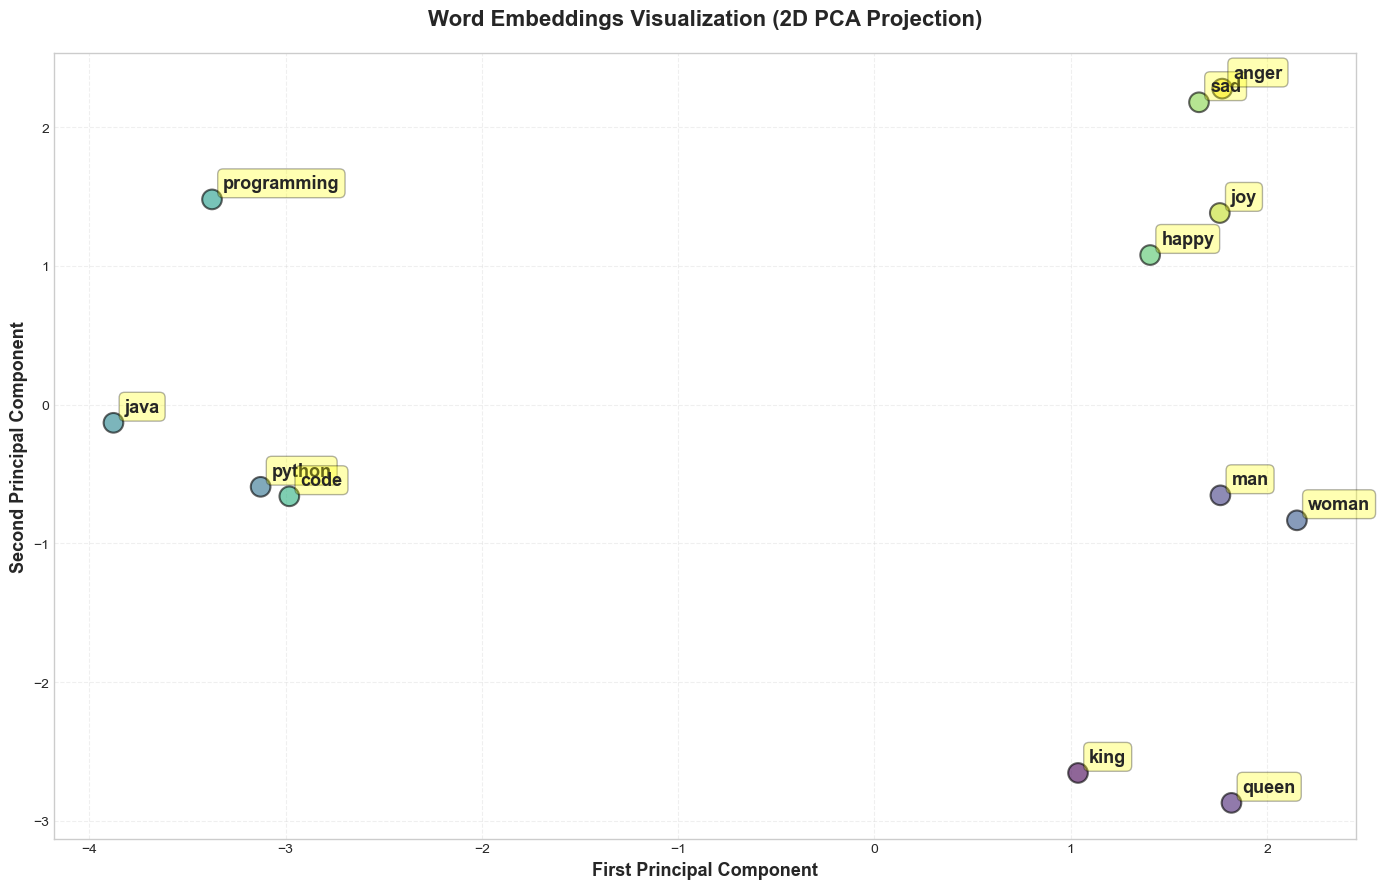


💡 Notice how:
   • 'king' and 'queen' are close together (royalty)
   • 'python' and 'java' are near each other (programming)
   • 'happy' and 'joy' cluster together (positive emotions)

✅ Similar meanings → similar positions in space!


In [24]:
# Visualize word relationships in 2D
print("\n🎨 VISUALIZING WORD RELATIONSHIPS IN 2D\n")

# Select words to visualize
words_to_plot = [
    'king', 'queen', 'man', 'woman',
    'python', 'java', 'programming', 'code',
    'happy', 'sad', 'joy', 'anger'
]

# Get vectors for valid words
valid_words = []
vectors = []

for word in words_to_plot:
    try:
        vectors.append(word2vec_model[word])
        valid_words.append(word)
    except KeyError:
        print(f"⚠️  Skipping '{word}' (not in vocabulary)")

print(f"\n✅ Visualizing {len(valid_words)} words\n")

# Reduce to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Create beautiful plot
plt.figure(figsize=(14, 9))

# Plot points
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], 
                     s=200, c=range(len(valid_words)), 
                     cmap='viridis', alpha=0.6, edgecolors='black', linewidth=1.5)

# Add labels
for i, word in enumerate(valid_words):
    plt.annotate(word, 
                xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                xytext=(8, 8),
                textcoords='offset points',
                fontsize=13,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.title('Word Embeddings Visualization (2D PCA Projection)', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('First Principal Component', fontsize=13, fontweight='bold')
plt.ylabel('Second Principal Component', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n💡 Notice how:")
print("   • 'king' and 'queen' are close together (royalty)")
print("   • 'python' and 'java' are near each other (programming)")
print("   • 'happy' and 'joy' cluster together (positive emotions)")
print("\n✅ Similar meanings → similar positions in space!")

### 💡 Key Insights:

✅ **Dense vectors** - Each word = 50 numbers (vs thousands in BoW)

✅ **Semantic similarity** - Similar words have similar vectors

✅ **Word arithmetic** - Mathematical relationships capture meaning

✅ **Pre-trained models** - Trained on billions of words, ready to use!

✅ **Foundation of modern NLP** - Used in BERT, GPT, and more

---

## 🎯 Challenge Time!

### 🏆 Challenge: Complete Text Analysis Pipeline

**Your Mission:** Build an end-to-end text analysis system!

**Tasks:**
1. Preprocess the movie reviews below
2. Create both BoW and TF-IDF representations
3. Find top 5 words per review (TF-IDF)
4. Use Word2Vec to find words similar to "excellent" and "terrible"
5. Bonus: Try word arithmetic with movie-related words!

**Hints:**
- Use `preprocess_text()` function
- `CountVectorizer()` for BoW
- `TfidfVectorizer()` for TF-IDF
- `.nlargest(5)` for top words
- `.most_similar()` for similar words

In [25]:
# Movie reviews for the challenge
movie_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the plot was engaging.",
    "Terrible film. Complete waste of time. Poor acting and boring storyline.",
    "Amazing cinematography! The visuals were stunning and the soundtrack was perfect.",
    "Not great, not terrible. Average movie with mediocre performances."
]

print("🎬 MOVIE REVIEWS CHALLENGE\n")
print("="*80)
for i, review in enumerate(movie_reviews, 1):
    print(f"\nReview {i}:")
    print(f"  {review}")

print("\n" + "="*80)
print("\n🚀 START YOUR CODE BELOW:\n")

# Your code here!






🎬 MOVIE REVIEWS CHALLENGE


Review 1:
  This movie was absolutely fantastic! The acting was superb and the plot was engaging.

Review 2:
  Terrible film. Complete waste of time. Poor acting and boring storyline.

Review 3:
  Amazing cinematography! The visuals were stunning and the soundtrack was perfect.

Review 4:
  Not great, not terrible. Average movie with mediocre performances.


🚀 START YOUR CODE BELOW:



In [26]:
# SOLUTION (Uncomment to see the answer)
"""
# Task 1: Preprocess reviews
print("Task 1: Preprocessing...\n")
processed_reviews = [' '.join(preprocess_text(review)) for review in movie_reviews]
for i, pr in enumerate(processed_reviews, 1):
    print(f"Review {i} (processed): {pr}")

# Task 2: Create BoW and TF-IDF
print("\nTask 2: Creating representations...\n")
bow_vec = CountVectorizer()
bow_matrix = bow_vec.fit_transform(movie_reviews)
print(f"BoW shape: {bow_matrix.shape}")

tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(movie_reviews)
print(f"TF-IDF shape: {tfidf_matrix.shape}")

# Task 3: Top 5 words per review
print("\nTask 3: Top 5 words per review (TF-IDF):\n")
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out())
for i in range(len(movie_reviews)):
    top5 = tfidf_df.iloc[i].nlargest(5)
    print(f"Review {i+1}: {list(top5.index)}")

# Task 4: Similar words
print("\nTask 4: Similar words:\n")
for word in ['excellent', 'terrible']:
    similar = word2vec_model.most_similar(word, topn=5)
    print(f"{word}: {[w for w, s in similar]}")

# Task 5: Word arithmetic
print("\nBonus: Word arithmetic!\n")
result = word2vec_model.most_similar(positive=['movie', 'excellent'], negative=['bad'], topn=3)
print(f"movie + excellent - bad = {[w for w, s in result]}")
"""

pass

---

## 📚 Summary - What We Learned Today

### 1. Text Preprocessing 🧹
- **Tokenization:** Breaking text into words
- **Lowercasing:** Normalizing text format
- **Stopword Removal:** Filtering out common words
- **Lemmatization:** Reducing words to base form

### 2. Bag of Words (BoW) 👜
- Simple word frequency counts
- Easy to understand and implement
- Limitations: Ignores order and context

### 3. TF-IDF 📊
- Highlights document-specific important words
- Downweights common words across documents
- Better for text classification tasks

### 4. Word2Vec Embeddings 🌟
- Dense vector representations (50-300 dimensions)
- Captures semantic relationships
- Enables word arithmetic and analogies
- Foundation for modern NLP (BERT, GPT)

---

## 🎯 Key Takeaways

✅ **Always preprocess text** before feeding to ML models

✅ **TF-IDF > BoW** for most practical applications

✅ **Word embeddings capture meaning**, not just frequency

✅ **Pre-trained models** are powerful and save time

✅ **Visualization helps** understand text representations

---

## 💡 Pro Tips

1. **Experiment with preprocessing** - Not all steps needed for every task
2. **TF-IDF for classification** - Works great for sentiment analysis
3. **Word2Vec for semantic tasks** - Best for finding similar words/documents
4. **Combine techniques** - Use preprocessing + TF-IDF + embeddings
5. **Visualize your data** - Always plot to understand patterns

---

## 🚀 Next Steps - Tomorrow!

**Day 2: Recurrent Neural Networks (RNNs)**
- Neural networks designed for sequential data
- Understanding hidden states and memory
- Building RNNs in PyTorch
- Character-level text generation

**Get ready to build AI that generates text! 🤖**

---

## 🎉 Congratulations!

You've completed Day 1 of the NLP module!

You now know:
- ✅ How to preprocess text
- ✅ How to represent text as numbers
- ✅ How word embeddings work
- ✅ How to analyze text data

**Keep practicing and see you tomorrow! 🚀**